In [1]:
import numpy as np
import pandas as pd
import operator
import timeit
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_model=pd.read_csv('H:/1_Xiaoxi_Ma_Project/Model B/Data/MODEL_RESPONSE_PULLTHROUGH_MARGIN_BROAD_endofjune_Augmailplan_forpullthroughonly.csv')
df_model.head()

,Unnamed: 0,TransactionID,PID,POWNER,PID_POWNER_SID_SOWNER,Date,RESPONSECOUNT,Deceased_Retired,RFL,Bad_Data,...,Income_estimator,Revolv_debt_bal,Mon_sinc_rec_inq,FICO_debt_ratio,Model_group,tr_year,tr_month,tr_day,tr_weekday,tr_year_month
0,51,66768139,21352038,CDM,21352038CDM25539313CDM,2017-07-14,1,0,0,0,...,60.0,3773.0,1.0,0.186059,A,2017,7,14,4,2017_7
1,59,67995653,13706936,SKA,13706936SKA25709838TU,2017-08-11,1,0,0,0,...,81.0,0.0,9.0,inf,A,2017,8,11,4,2017_8
2,97,69486335,21340675,CDM,21340675CDM25589235CDM,2017-09-18,1,0,0,0,...,NaN,NaN,NaN,NaN,B,2017,9,18,0,2017_9
3,351,67123056,19395649,VER,19395649VER7641043VER,2017-07-21,1,0,0,0,...,117.0,15481.0,15.0,0.048511,A,2017,7,21,4,2017_7
4,821,70871599,21479544,CDM,21479544CDM25897275CDM,2017-10-06,1,0,0,0,...,179.0,27801.0,0.0,0.025683,A,2017,10,6,4,2017_10


In [3]:
df_model.describe()

,Unnamed: 0,TransactionID,PID,RESPONSECOUNT,Deceased_Retired,RFL,Bad_Data,Non_Healthcare,QUALITY_RESPONSECOUNT,FUND_CNT,...,TU_Transaction_Diffdays,FICO,Income_estimator,Revolv_debt_bal,Mon_sinc_rec_inq,FICO_debt_ratio,tr_year,tr_month,tr_day,tr_weekday
count,5.335500e+04,5.335500e+04,5.335500e+04,53355.0,53355.000000,53355.000000,53355.000000,53355.000000,53355.000000,53355.000000,...,37631.000000,37490.000000,37400.000000,3.508000e+04,31090.000000,3.508000e+04,53355.000000,53355.000000,53355.000000,53355.000000
mean,1.000324e+07,6.950619e+07,6.355681e+07,1.0,0.017637,0.137906,0.072139,0.028151,0.757455,0.117740,...,160.487816,687.272902,127.463289,3.152409e+04,5.580476,inf,2017.251991,5.697423,13.424159,2.067548
std,5.779111e+06,6.707159e+06,2.143661e+08,0.0,0.131628,0.344805,0.258721,0.165406,0.428626,0.322303,...,156.303788,98.165910,76.247017,6.981867e+04,5.785527,NaN,0.434160,3.432793,8.680330,1.956036
min,5.100000e+01,5.902612e+07,9.300000e+01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.000000,0.000000,21.000000,0.000000e+00,0.000000,0.000000e+00,2017.000000,1.000000,1.000000,0.000000
25%,4.978298e+06,6.385039e+07,1.244611e+07,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,60.000000,643.000000,73.000000,3.435000e+03,1.000000,2.182700e-02,2017.000000,3.000000,6.000000,0.000000
50%,1.000240e+07,6.899726e+07,1.940646e+07,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,100.000000,697.000000,108.000000,1.311950e+04,3.000000,5.373571e-02,2017.000000,5.000000,12.000000,4.000000
75%,1.501849e+07,7.473900e+07,2.128759e+07,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,186.000000,748.000000,160.000000,3.231800e+04,8.000000,1.975770e-01,2018.000000,9.000000,21.000000,4.000000
max,2.003201e+07,8.575961e+07,2.012744e+09,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1185.000000,850.000000,780.000000,2.894858e+06,24.000000,inf,2018.000000,12.000000,31.000000,6.000000


## MODEL B

In [4]:
df_modelb=pd.DataFrame(df_model[df_model.Model_group =='B'])
df_modelb.describe()

,Unnamed: 0,TransactionID,PID,RESPONSECOUNT,Deceased_Retired,RFL,Bad_Data,Non_Healthcare,QUALITY_RESPONSECOUNT,FUND_CNT,...,TU_Transaction_Diffdays,FICO,Income_estimator,Revolv_debt_bal,Mon_sinc_rec_inq,FICO_debt_ratio,tr_year,tr_month,tr_day,tr_weekday
count,1.295500e+04,1.295500e+04,1.295500e+04,12955.0,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,...,309.000000,313.000000,224.000000,15.000000,63.000000,15.000000,12955.000000,12955.000000,12955.000000,12955.000000
mean,9.867383e+06,6.915717e+07,4.630014e+07,1.0,0.039907,0.227248,0.062756,0.031416,0.655191,0.092397,...,373.886731,38.472524,64.910714,1507.600000,6.492063,inf,2017.259977,5.378464,13.386415,2.031725
std,5.765645e+06,7.062434e+06,1.720390e+08,0.0,0.195749,0.419070,0.242532,0.174447,0.475324,0.289596,...,257.880692,99.186496,17.948883,2921.053743,7.123050,NaN,0.438639,3.064151,8.838435,1.959091
min,9.700000e+01,5.902612e+07,6.400000e+02,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,0.000000,28.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
25%,4.901308e+06,6.343830e+07,1.254576e+07,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,101.000000,0.000000,56.750000,1.000000,1.000000,0.136602,2017.000000,3.000000,6.000000,0.000000
50%,9.779212e+06,6.803569e+07,1.916723e+07,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,410.000000,42.700000,67.000000,213.000000,3.000000,0.260627,2017.000000,5.000000,12.000000,1.000000
75%,1.483793e+07,7.478871e+07,2.125965e+07,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,551.000000,49.900000,73.000000,1721.500000,10.000000,inf,2018.000000,8.000000,21.000000,4.000000
max,2.003201e+07,8.558853e+07,2.012005e+09,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1163.000000,840.000000,245.000000,11220.000000,24.000000,inf,2018.000000,12.000000,31.000000,5.000000


In [5]:
# Drop TU variables from dataset

df_modelb_drop=df_modelb.drop(df_modelb.ix[:,'Months_Since_Inq':'tupsch1Numinq6'].head(0).columns, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
print(df_modelb_drop.isnull().sum())  # Count missing value for each variables

Unnamed: 0                                     0
TransactionID                                  0
PID                                            0
POWNER                                         0
PID_POWNER_SID_SOWNER                          0
Date                                           0
RESPONSECOUNT                                  0
Deceased_Retired                               0
RFL                                            0
Bad_Data                                       0
Non_Healthcare                                 0
QUALITY_RESPONSECOUNT                          0
FUND_CNT                                       0
NEWMARGIN                                      0
7month_INC_consecutivecount_PS              4890
7month_PIECEGRP_consecutivecount_PS         1211
7Month_PIECEGRP_count_PS                    1211
7month_transactions_consecutivecount           0
7month_transactions_consecutivecount_PS        0
ADDRESS_TYPE                                   0
Decile              

In [26]:
# ! pip install missingno
import missingno as msno

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


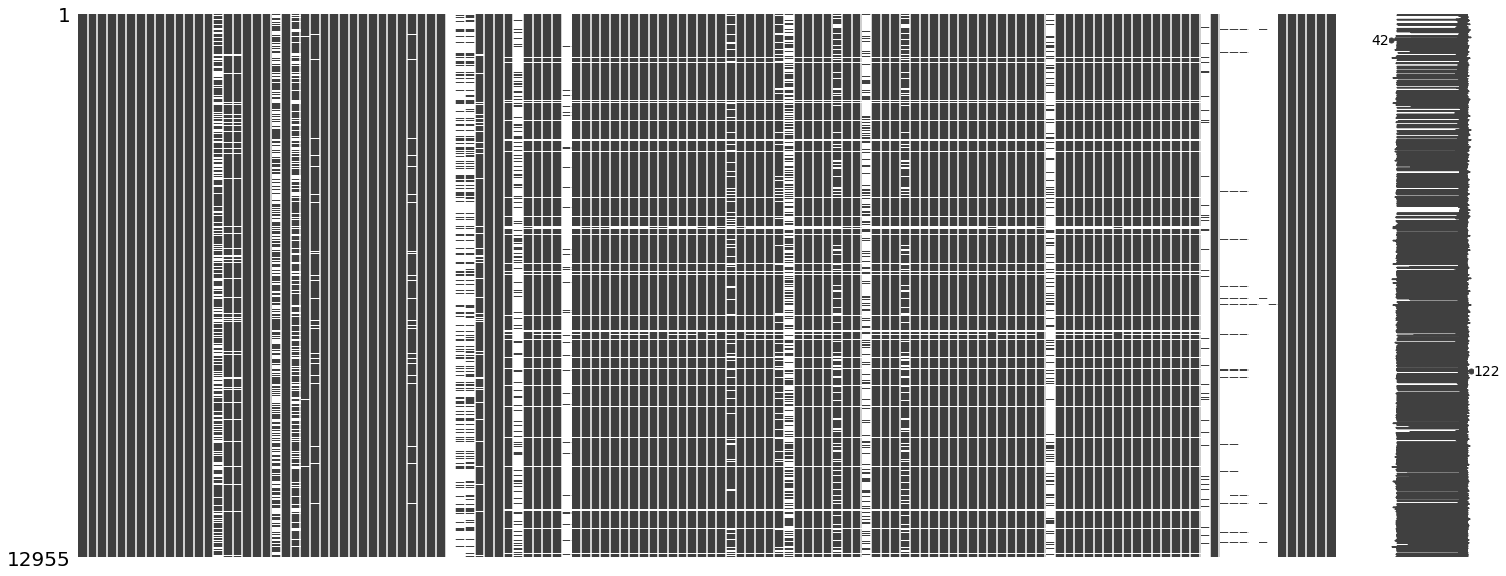

In [477]:
msno.matrix(df_modelb_drop)     #Visulizing missing value

## Continous and Category variables

In [7]:
ref_contin_categ = pd.read_csv('H:/1_Xiaoxi_Ma_Project/Model B/Data Dictionary/keykeykey_reference_contin_categ_MIG_TU_LN_021918.csv')
ref_contin = list(ref_contin_categ.contin)
ref_categ = list(ref_contin_categ.categ)


In [8]:
col_select_dev =[
'SENT_24MO',
'PropEverSoldCnt',
'PPCurrOwnedCnt',
'RaACrtRecLienJudgAmtMax',
'Total_Sent_Site',
'HHCrtRecMsdmeanMmbrCnt12Mo',
'HHPPCurrOwnedWtrcrftCnt',
'RaACollege4yrAttendedMmbrCnt',
'CrtRecLienJudgAmtTtl',
'ResCurrBusinessCnt',
'PropCurrOwnedAssessedTtl',
'CrtRecMsdmeanTimeNewest',
'CrtRecTimeNewest',
'CrtRecBkrptCnt',
'CrtRecCnt',
'CrtRecCnt12Mo',
'Total_Sent_Practitioner',
'LifeEvTimeLastMove',
'ResCurrAVMBlockRatio',
'PPCurrOwnedAutoCnt',
'RaACollege2yrAttendedMmbrCnt',
'HHCollege4yrAttendedMmbrCnt',
'SENT_12MO',
'PropCurrOwnedCnt',
'RaAOccProfLicMmbrCnt',
'CrtRecEvictionCnt',
'HHCrtRecEvictionMmbrCnt',
'PropSoldRatio',
'ResInputAVMValue',
'PropEverOwnedCnt',
'HHPPCurrOwnedMtrcycleCnt',
'PropCurrOwnedAVMTtl',
'RaACrtRecMmbrCnt',
'7Month_PIECEGRP_count_PS',
'RaACrtRecFelonyMmbrCnt',
'ResCurrMortgageAmount',
'SENT_3MO',
'RaAPropOwnerAVMHighest',
'HHCrtRecMmbrCnt12Mo',
'ResCurrAVMRatioDiff60Mo',
'SENT_6MO',
'HHCollegePrivateMmbrCnt',
'LifeEvTimeFirstAssetPurchase',
'RaAPPCurrOwnerAircrftMmbrCnt',
'ProspectAge',
'SENT_18MO',
'7month_PIECEGRP_consecutivecount_PS',
'7month_INC_consecutivecount_PS',
'CrtRecBkrptTimeNewest',
'HHYoungAdultMmbrCnt',
'PropTimeLastSale',
'CrtRecEvictionTimeNewest',
'RaAPropCurrOwnerMmbrCnt',
'RaAOccBusinessAssocMmbrCnt',
'7month_transactions_consecutivecount',
'HHCollege2yrAttendedMmbrCnt',
'PPCurrOwnedMtrcycleCnt',
'ResCurrAVMValue60Mo',
'ADDRESS_TYPE',
'Decile',
'MEDICALTITLEGROUP',
'NEWTU',
'Num_Business',
'Num_Home',
'Site_type',
'SPECIALTY',
'State',
'CrtRecBkrptTimeNewest_spec_flag',
'CrtRecLienJudgTimeNewest_spec_flag',
'CrtRecSeverityIndex',
'CrtRecTimeNewest_spec_flag',
'OccBusinessTitleLeadership',
'OccProfLicenseCategory',
'RaAMedIncomeRange',
'DoNotMail',
'ProspectBankingExperience',
'HHCollegeTierMmbrHighest',
'AssetCurrOwner',
'ProspectGender',
'ProspectCollegePrivate',
'VerifiedCurrResMatchIndex'

 ]


In [9]:
col_categ = [i for i in col_select_dev if i in ref_categ]
col_contin = [i for i in col_select_dev if i in ref_contin]

col_contin = list(set(col_contin))
col_contin = list(set(col_contin))

col_y = ['FUND_CNT']  

# Leadtype is created by Mei, we need to remove this one
# col_categ.remove('LEADTYPE')

In [10]:
print('col_categ', col_categ)
print('******************************************************************************************************')
print('col_contin', col_contin)


col_categ ['ADDRESS_TYPE', 'Decile', 'MEDICALTITLEGROUP', 'NEWTU', 'Num_Business', 'Num_Home', 'Site_type', 'SPECIALTY', 'State', 'CrtRecBkrptTimeNewest_spec_flag', 'CrtRecLienJudgTimeNewest_spec_flag', 'CrtRecSeverityIndex', 'CrtRecTimeNewest_spec_flag', 'OccBusinessTitleLeadership', 'OccProfLicenseCategory', 'RaAMedIncomeRange', 'DoNotMail', 'ProspectBankingExperience', 'HHCollegeTierMmbrHighest', 'AssetCurrOwner', 'ProspectGender', 'ProspectCollegePrivate', 'VerifiedCurrResMatchIndex']
******************************************************************************************************
col_contin ['HHCrtRecMsdmeanMmbrCnt12Mo', 'ResCurrMortgageAmount', '7month_transactions_consecutivecount', 'CrtRecTimeNewest', 'RaAOccProfLicMmbrCnt', 'SENT_3MO', 'CrtRecEvictionCnt', 'HHCollegePrivateMmbrCnt', 'RaAOccBusinessAssocMmbrCnt', 'ResCurrAVMValue60Mo', 'CrtRecMsdmeanTimeNewest', 'CrtRecCnt', 'Total_Sent_Practitioner', 'CrtRecBkrptTimeNewest', '7month_PIECEGRP_consecutivecount_PS', 'SENT_12

In [11]:
## Make copy of dataset to aviod issue

df_contin = df_modelb_drop[col_contin].copy()
df_categ = df_modelb_drop[col_categ].copy()

In [12]:
# fill missing values with mean column values for numeric variables

df_contin.fillna(df_contin.mean(), inplace=True)

In [13]:
df_contin  # 71 columns,58 columns

,HHCrtRecMsdmeanMmbrCnt12Mo,ResCurrMortgageAmount,7month_transactions_consecutivecount,CrtRecTimeNewest,RaAOccProfLicMmbrCnt,SENT_3MO,CrtRecEvictionCnt,HHCollegePrivateMmbrCnt,RaAOccBusinessAssocMmbrCnt,ResCurrAVMValue60Mo,...,HHPPCurrOwnedWtrcrftCnt,Total_Sent_Site,PropTimeLastSale,CrtRecCnt12Mo,HHCollege2yrAttendedMmbrCnt,RaAPropCurrOwnerMmbrCnt,RaACollege2yrAttendedMmbrCnt,CrtRecLienJudgAmtTtl,ResCurrAVMBlockRatio,RaACrtRecMmbrCnt
2,0.000000,192075.000000,0,63.000000,1.000000,2,0.000000,0.000000,5.000000,0.000000,...,0.000000,2,54.000000,0.000000,0.00000,9.000000,0.000000,0.000000,0.000000,14.000000
19,0.000000,0.000000,0,36.000000,1.000000,1,2.000000,0.000000,0.000000,0.000000,...,0.000000,1,116.547627,0.000000,0.00000,11.000000,0.000000,0.000000,0.000000,6.000000
24,0.000000,0.000000,0,91.761808,1.000000,2,0.000000,0.000000,0.000000,0.000000,...,0.000000,18,116.547627,0.000000,0.00000,2.000000,0.000000,0.000000,1.000000,0.000000
34,0.000000,0.000000,0,22.000000,0.000000,0,7.000000,0.000000,0.000000,0.000000,...,0.000000,0,116.547627,0.000000,0.00000,0.000000,0.000000,42364.000000,0.000000,0.000000
35,0.000000,0.000000,0,13.000000,0.000000,2,0.000000,0.000000,1.000000,369487.000000,...,0.000000,3,116.547627,0.000000,0.00000,1.000000,0.000000,24381.000000,1.000000,2.000000
39,0.000000,0.000000,0,124.000000,3.000000,2,0.000000,0.000000,5.000000,0.000000,...,0.000000,2,116.547627,0.000000,0.00000,11.000000,0.000000,14084.000000,7.000000,10.000000
51,0.000000,0.000000,0,91.761808,5.000000,1,0.000000,0.000000,3.000000,72500.000000,...,0.000000,1,147.000000,0.000000,0.00000,5.000000,0.000000,0.000000,1.000000,5.000000
54,0.000000,0.000000,0,91.761808,0.000000,0,0.000000,0.000000,0.000000,317719.000000,...,0.000000,0,116.547627,0.000000,0.00000,3.000000,1.000000,0.000000,1.000000,1.000000
63,0.000000,0.000000,0,3.000000,1.000000,3,0.000000,0.000000,0.000000,445000.000000,...,0.000000,0,133.000000,1.000000,0.00000,5.000000,0.000000,2730.000000,1.000000,2.000000
64,0.000000,414000.000000,0,91.761808,4.000000,1,0.000000,0.000000,4.000000,246273.000000,...,0.000000,0,116.547627,0.000000,0.00000,4.000000,0.000000,0.000000,1.000000,4.000000


In [14]:
# fill missing values with mean column values for categorical variables

df_categ.fillna(df_categ.mode().iloc[0], inplace=True)

df_categ  # 25 colunmns,23 columns

,ADDRESS_TYPE,Decile,MEDICALTITLEGROUP,NEWTU,Num_Business,Num_Home,Site_type,SPECIALTY,State,CrtRecBkrptTimeNewest_spec_flag,...,OccBusinessTitleLeadership,OccProfLicenseCategory,RaAMedIncomeRange,DoNotMail,ProspectBankingExperience,HHCollegeTierMmbrHighest,AssetCurrOwner,ProspectGender,ProspectCollegePrivate,VerifiedCurrResMatchIndex
2,RN HOME,4.0,RN,0,0,0,1,SECONDARY,FL,0.0,...,0.0,2.0,7.0,0.0,2.0,0.0,0.0,F,0.0,2.0
19,VER New Home,1.0,RN,0,0,1,1,SECONDARY,AL,0.0,...,0.0,2.0,7.0,0.0,0.0,0.0,0.0,F,0.0,2.0
24,Home,7.0,MD,0,1,2,1,PRIMARY,PA,1.0,...,1.0,0.0,8.0,0.0,2.0,0.0,0.0,M,0.0,2.0
34,RN HOME,4.0,RN,0,0,0,1,SECONDARY,NY,1.0,...,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,F,0.0,2.0
35,RN HOME,4.0,RN,0,0,1,1,SECONDARY,MD,0.0,...,0.0,2.0,6.0,0.0,1.0,0.0,1.0,M,0.0,2.0
39,RN HOME,4.0,RN,0,0,1,1,SECONDARY,NY,1.0,...,0.0,3.0,7.0,0.0,2.0,0.0,1.0,F,0.0,2.0
51,RN HOME,4.0,RN,0,0,1,1,SECONDARY,FL,1.0,...,0.0,3.0,6.0,0.0,2.0,0.0,1.0,F,0.0,0.0
54,TU HOME HYGIENE,4.0,PT,0,0,2,1,SECONDARY,MD,1.0,...,2.0,0.0,7.0,0.0,2.0,0.0,1.0,M,0.0,2.0
63,TU HOME2,6.0,NP,0,1,1,1,SECONDARY,CT,0.0,...,1.0,5.0,9.0,0.0,1.0,0.0,0.0,F,0.0,2.0
64,TU HOME HYGIENE,4.0,PA,0,2,1,1,SECONDARY,AZ,1.0,...,1.0,0.0,8.0,0.0,2.0,4.0,0.0,F,0.0,2.0


In [15]:
print(df_categ.isnull().sum())  # Count missing value

ADDRESS_TYPE                          0
Decile                                0
MEDICALTITLEGROUP                     0
NEWTU                                 0
Num_Business                          0
Num_Home                              0
Site_type                             0
SPECIALTY                             0
State                                 0
CrtRecBkrptTimeNewest_spec_flag       0
CrtRecLienJudgTimeNewest_spec_flag    0
CrtRecSeverityIndex                   0
CrtRecTimeNewest_spec_flag            0
OccBusinessTitleLeadership            0
OccProfLicenseCategory                0
RaAMedIncomeRange                     0
DoNotMail                             0
ProspectBankingExperience             0
HHCollegeTierMmbrHighest              0
AssetCurrOwner                        0
ProspectGender                        0
ProspectCollegePrivate                0
VerifiedCurrResMatchIndex             0
dtype: int64


# change into one hot encoding

In [16]:
# encode labels with value between 0 and n_classes-1.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# use df.apply() to apply le.fit_transform to all columns
df_categ  = df_categ.apply(le.fit_transform)

In [17]:
 # Concatenating two dataframe together by columns
    
df_modelb_nomissing=pd.concat([df_contin,df_categ,df_modelb_drop['FUND_CNT']],axis=1)

In [18]:
# seperate data into 2018.2, 2018.3,2018.4,2018.5

df_modelb_P = df_modelb_nomissing[(df_modelb_drop.tr_year == 2017) ]
# df_modelb_P2 = df_modelb_nomissing[(df_modelb_drop.tr_year == 2018) & (df_modelb_drop.tr_month>=1)&(df_modelb_drop.tr_month<=3)]
# df_modelb_P=pd.concat([df_modelb_P1,df_modelb_P2]) # Concatenating two dataframe together by rows

df_modelb_P_201801 = df_modelb_nomissing[(df_modelb_drop.tr_year == 2018) & (df_modelb_drop.tr_month==1)]
df_modelb_P_201802 = df_modelb_nomissing[(df_modelb_drop.tr_year == 2018) & (df_modelb_drop.tr_month==2)]
df_modelb_P_201803= df_modelb_nomissing[(df_modelb_drop.tr_year == 2018) & (df_modelb_drop.tr_month==3)]
df_modelb_P_201804 = df_modelb_nomissing[(df_modelb_drop.tr_year == 2018) & (df_modelb_drop.tr_month==4)]
df_modelb_P_201805 = df_modelb_nomissing[(df_modelb_drop.tr_year == 2018) & (df_modelb_drop.tr_month==5)]


In [19]:
col_select_1 =  col_contin  + col_categ + col_y  

In [20]:
df_modelb_P_select = df_modelb_P[col_select_1]

df_modelb_P_select_201801 = df_modelb_P_201801[col_select_1]
df_modelb_P_select_201802 = df_modelb_P_201802[col_select_1]
df_modelb_P_select_201803 = df_modelb_P_201803[col_select_1]
df_modelb_P_select_201804  = df_modelb_P_201804[col_select_1]
df_modelb_P_select_201805  = df_modelb_P_201805[col_select_1]

In [21]:
df_modelb_P_select.iloc[:,0:81] 

,HHCrtRecMsdmeanMmbrCnt12Mo,ResCurrMortgageAmount,7month_transactions_consecutivecount,CrtRecTimeNewest,RaAOccProfLicMmbrCnt,SENT_3MO,CrtRecEvictionCnt,HHCollegePrivateMmbrCnt,RaAOccBusinessAssocMmbrCnt,ResCurrAVMValue60Mo,...,OccBusinessTitleLeadership,OccProfLicenseCategory,RaAMedIncomeRange,DoNotMail,ProspectBankingExperience,HHCollegeTierMmbrHighest,AssetCurrOwner,ProspectGender,ProspectCollegePrivate,VerifiedCurrResMatchIndex
2,0.000000,192075.000000,0,63.000000,1.000000,2,0.000000,0.000000,5.000000,0.000000,...,1,3,7,1,3,1,1,2,1,3
19,0.000000,0.000000,0,36.000000,1.000000,1,2.000000,0.000000,0.000000,0.000000,...,1,3,7,1,1,1,1,2,1,3
24,0.000000,0.000000,0,91.761808,1.000000,2,0.000000,0.000000,0.000000,0.000000,...,2,1,8,1,3,1,1,3,1,3
34,0.000000,0.000000,0,22.000000,0.000000,0,7.000000,0.000000,0.000000,0.000000,...,1,3,0,1,1,1,1,2,1,3
35,0.000000,0.000000,0,13.000000,0.000000,2,0.000000,0.000000,1.000000,369487.000000,...,1,3,6,1,2,1,2,3,1,3
39,0.000000,0.000000,0,124.000000,3.000000,2,0.000000,0.000000,5.000000,0.000000,...,1,4,7,1,3,1,2,2,1,3
51,0.000000,0.000000,0,91.761808,5.000000,1,0.000000,0.000000,3.000000,72500.000000,...,1,4,6,1,3,1,2,2,1,1
54,0.000000,0.000000,0,91.761808,0.000000,0,0.000000,0.000000,0.000000,317719.000000,...,3,1,7,1,3,1,2,3,1,3
63,0.000000,0.000000,0,3.000000,1.000000,3,0.000000,0.000000,0.000000,445000.000000,...,2,6,9,1,2,1,1,2,1,3
64,0.000000,414000.000000,0,91.761808,4.000000,1,0.000000,0.000000,4.000000,246273.000000,...,2,1,8,1,3,5,1,2,1,3


In [22]:
df_categ

,ADDRESS_TYPE,Decile,MEDICALTITLEGROUP,NEWTU,Num_Business,Num_Home,Site_type,SPECIALTY,State,CrtRecBkrptTimeNewest_spec_flag,...,OccBusinessTitleLeadership,OccProfLicenseCategory,RaAMedIncomeRange,DoNotMail,ProspectBankingExperience,HHCollegeTierMmbrHighest,AssetCurrOwner,ProspectGender,ProspectCollegePrivate,VerifiedCurrResMatchIndex
2,5,3,19,0,0,0,0,3,9,0,...,1,3,7,1,3,1,1,2,1,3
19,13,0,19,0,0,1,0,3,1,0,...,1,3,7,1,1,1,1,2,1,3
24,4,6,10,0,1,2,0,2,38,1,...,2,1,8,1,3,1,1,3,1,3
34,5,3,19,0,0,0,0,3,34,1,...,1,3,0,1,1,1,1,2,1,3
35,5,3,19,0,0,1,0,3,20,0,...,1,3,6,1,2,1,2,3,1,3
39,5,3,19,0,0,1,0,3,34,1,...,1,4,7,1,3,1,2,2,1,3
51,5,3,19,0,0,1,0,3,9,1,...,1,4,6,1,3,1,2,2,1,1
54,10,3,16,0,0,2,0,3,20,1,...,3,1,7,1,3,1,2,3,1,3
63,11,5,11,0,1,1,0,3,6,0,...,2,6,9,1,2,1,1,2,1,3
64,10,3,14,0,2,1,0,3,3,1,...,2,1,8,1,3,5,1,2,1,3


## Logistic Regression

In [22]:
linear_y=df_modelb_P_select['FUND_CNT']
linear_y=pd.to_numeric(linear_y)
linear_x=df_modelb_P_select.iloc[:,0:81] 
linear_x

,SENT_24MO,HHCollegePrivateMmbrCnt,PropCurrOwnedCnt,HHCrtRecMsdmeanMmbrCnt12Mo,RaAOccProfLicMmbrCnt,RaACrtRecLienJudgAmtMax,CrtRecBkrptTimeNewest,PropEverSoldCnt,LifeEvTimeFirstAssetPurchase,HHCollege2yrAttendedMmbrCnt,...,OccBusinessTitleLeadership,OccProfLicenseCategory,RaAMedIncomeRange,DoNotMail,ProspectBankingExperience,HHCollegeTierMmbrHighest,AssetCurrOwner,ProspectGender,ProspectCollegePrivate,VerifiedCurrResMatchIndex
2,2,0.000000,1.000000,0.000000,1.000000,3123.000000,92.000000,3.000000,141.000000,0.00000,...,1,3,7,1,3,1,1,2,1,3
19,1,0.000000,0.000000,0.000000,1.000000,4553.000000,36.000000,0.000000,144.532698,0.00000,...,1,3,7,1,1,1,1,2,1,3
24,17,0.000000,1.000000,0.000000,1.000000,0.000000,101.613073,0.000000,0.000000,0.00000,...,2,1,8,1,3,1,1,3,1,3
34,0,0.000000,0.000000,0.000000,0.000000,0.000000,101.613073,0.000000,144.532698,0.00000,...,1,3,0,1,1,1,1,2,1,3
35,3,0.000000,2.000000,0.000000,0.000000,0.000000,66.000000,0.000000,104.000000,0.00000,...,1,3,6,1,2,1,2,3,1,3
39,2,0.000000,3.000000,0.000000,3.000000,7270.000000,101.613073,0.000000,98.000000,0.00000,...,1,4,7,1,3,1,2,2,1,3
51,1,0.000000,1.000000,0.000000,5.000000,16843.000000,101.613073,3.000000,224.000000,0.00000,...,1,4,6,1,3,1,2,2,1,1
54,0,0.000000,1.000000,0.000000,0.000000,0.000000,101.613073,0.000000,110.000000,0.00000,...,3,1,7,1,3,1,2,3,1,3
63,12,0.000000,1.000000,0.000000,1.000000,2730.000000,31.000000,3.000000,209.000000,0.00000,...,2,6,9,1,2,1,1,2,1,3
64,6,0.000000,2.000000,0.000000,4.000000,776.000000,101.613073,0.000000,154.000000,0.00000,...,2,1,8,1,3,5,1,2,1,3


In [23]:
df_modelb_P_select.dtypes

SENT_24MO                                 int64
HHCollegePrivateMmbrCnt                 float64
PropCurrOwnedCnt                        float64
HHCrtRecMsdmeanMmbrCnt12Mo              float64
RaAOccProfLicMmbrCnt                    float64
RaACrtRecLienJudgAmtMax                 float64
CrtRecBkrptTimeNewest                   float64
PropEverSoldCnt                         float64
LifeEvTimeFirstAssetPurchase            float64
HHCollege2yrAttendedMmbrCnt             float64
PPCurrOwnedAutoCnt                      float64
ProspectAge                             float64
HHCollege4yrAttendedMmbrCnt             float64
ResCurrAVMRatioDiff60Mo                 float64
Total_Sent_Site                           int64
RaAOccBusinessAssocMmbrCnt              float64
PPCurrOwnedCnt                          float64
PropCurrOwnedAssessedTtl                float64
CrtRecEvictionCnt                       float64
CrtRecBkrptCnt                          float64
RaAPropOwnerAVMHighest                  

In [49]:

regr=linear_model.LogisticRegression(class_weight='balanced',penalty='l1')

regr.fit(linear_x, linear_y)

# class_weight='balanced',penalty='l1'
# regr.fit(linear_x, linear_y)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## FDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [26]:
lda = LinearDiscriminantAnalysis(n_components=8)

lda.fit(linear_x, linear_y)


LinearDiscriminantAnalysis(n_components=8, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [27]:
lda.explained_variance_ratio_

array([1.])

In [28]:
X_lda = lda.fit(linear_x, linear_y).transform(linear_x)

## PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

linear_x_NORM= preprocessing.normalize(linear_x, norm='l2') # normolizing 

pca = PCA(n_components=8)
pca.fit(linear_x)

print(np.around(pca.explained_variance_ratio_,3))  


[0.446 0.228 0.142 0.071 0.043 0.031 0.03  0.007]


Text(0.5,1,'PCA of MODELB dataset')

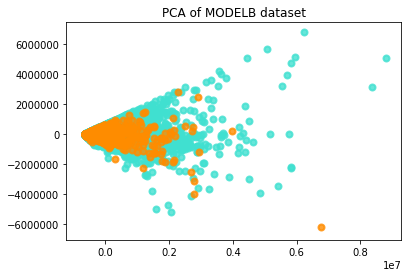

In [30]:
X_r = pca.fit(linear_x).transform(linear_x)

plt.figure()
colors = ['turquoise',  'darkorange']
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r[linear_y == i, 0], X_r[linear_y == i, 1], color=color, alpha=.8, lw=lw)
                
plt.title('PCA of MODELB dataset')

In [48]:
import statsmodels.api as sm

regr_sm = sm.Logit(linear_y,linear_x)
regr_sm_fit=regr_sm.fit()
print (regr_sm_fit.summary2())


Optimization terminated successfully.
         Current function value: 0.261457
         Iterations 8
                                   Results: Logit
Model:                      Logit                  No. Iterations:         8.0000   
Dependent Variable:         FUND_CNT               Pseudo R-squared:       0.085    
Date:                       2018-07-19 09:52       AIC:                    5175.1746
No. Observations:           9587                   BIC:                    5755.7958
Df Model:                   80                     Log-Likelihood:         -2506.6  
Df Residuals:               9506                   LL-Null:                -2738.1  
Converged:                  1.0000                 Scale:                  1.0000   
------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------

In [32]:
glm_binom = sm.GLM(linear_y,linear_x, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               FUND_CNT   No. Observations:                 9587
Model:                            GLM   Df Residuals:                     9506
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Thu, 19 Jul 2018   Deviance:                       5013.2
Time:                        09:37:43   Pearson chi2:                 9.35e+03
No. Iterations:                     7                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
SENT_24MO                                0.0186      0.051      0.365      0.71

In [33]:
from sklearn.preprocessing import StandardScaler   # this is important 

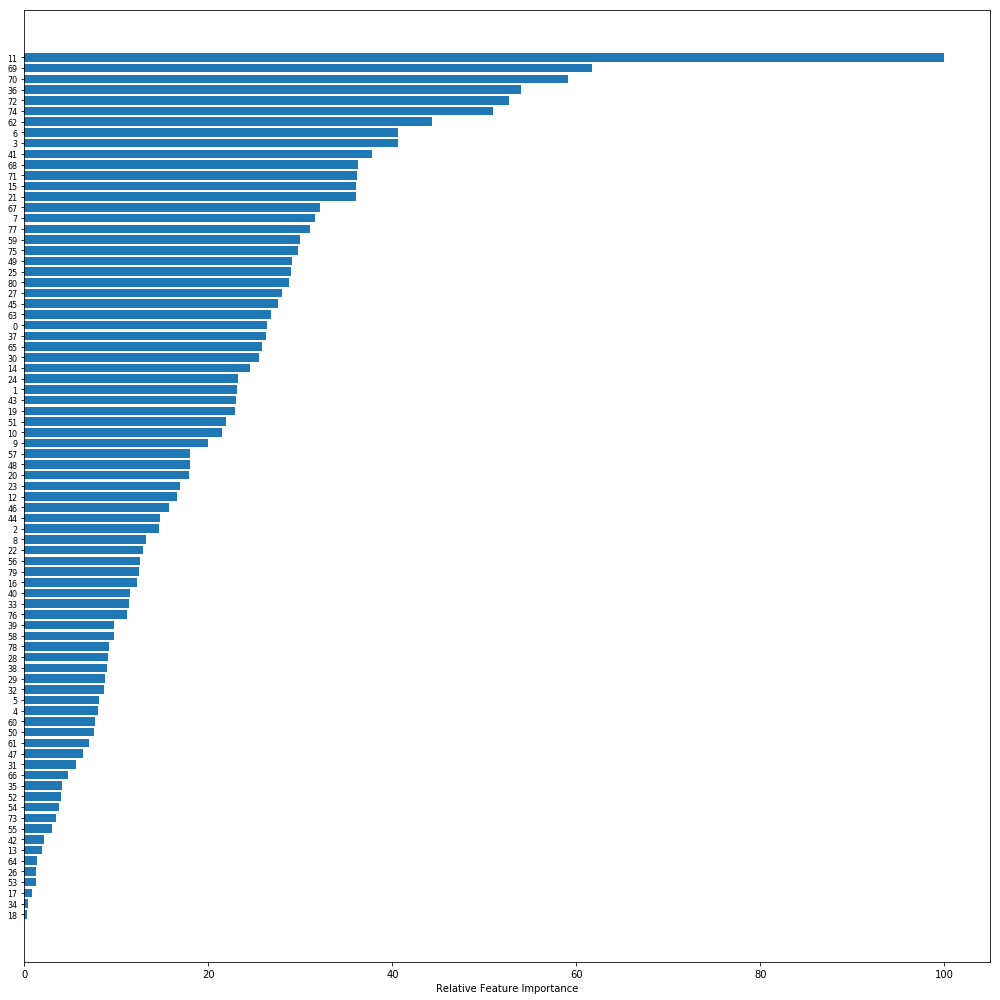

In [43]:
#Scale your data
scaler = StandardScaler()
scaler.fit(linear_x) 
X_scaled = pd.DataFrame(scaler.transform(linear_x))

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, linear_y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 1

featfig = plt.figure(figsize=(14,14))

featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_scaled.columns[sorted_idx]), fontsize=8)
featax.set_xlabel('Relative Feature Importance')


plt.tight_layout()   
plt.show()

In [44]:
print(pd.concat([pd.DataFrame(feature_importance[sorted_idx]),pd.DataFrame(sorted_idx)],axis=1) )
clf.coef_[0]

             0   0
0     0.248061  18
1     0.427834  34
2     0.794172  17
3     1.207690  53
4     1.283288  26
5     1.392641  64
6     1.925330  13
7     2.099591  42
8     2.981668  55
9     3.445968  73
10    3.726672  54
11    3.986560  52
12    4.042378  35
13    4.737951  66
14    5.642700  31
15    6.330525  47
16    7.058723  61
17    7.610714  50
18    7.678110  60
19    8.027168   4
20    8.144485   5
21    8.624875  32
22    8.783753  29
23    8.954126  38
24    9.042682  28
25    9.175562  78
26    9.752109  58
27    9.762380  39
28   11.131784  76
29   11.416845  33
..         ...  ..
51   24.519705  14
52   25.532096  30
53   25.835991  65
54   26.294965  37
55   26.321316   0
56   26.784637  63
57   27.563063  45
58   28.030235  27
59   28.717627  80
60   28.992510  25
61   29.120595  49
62   29.725278  75
63   29.987117  59
64   31.034591  77
65   31.563370   7
66   32.181756  67
67   36.025982  21
68   36.074933  15
69   36.210381  71
70   36.281590  68
71   37.7952

array([ 0.10696389, -0.09377166, -0.05940899,  0.16495176, -0.0326206 ,
        0.03309735,  0.16497295,  0.12826641, -0.05366351,  0.08123152,
        0.08748837, -0.40637743,  0.06761601,  0.0078241 ,  0.09964255,
       -0.14660039,  0.04956506, -0.00322733,  0.00100806,  0.09281602,
       -0.0726401 , -0.14640146, -0.05243313,  0.06889697, -0.09441197,
       -0.11781902, -0.00521499,  0.11390855,  0.03674742,  0.03569519,
        0.10375668, -0.02293066,  0.03504954, -0.04639548,  0.00173862,
        0.01642731, -0.21938791,  0.1068568 ,  0.03638755, -0.03967211,
       -0.04662012, -0.15359153,  0.00853226, -0.09369267,  0.05999433,
       -0.11201007, -0.06408057, -0.02572583,  0.072936  , -0.11833952,
       -0.03092822,  0.08899869,  0.01620048,  0.00490778,  0.01514435,
       -0.01211682,  0.05086576,  0.07337145, -0.03963037, -0.12186088,
        0.03120211, -0.02868506,  0.18010055,  0.10884672, -0.00565938,
        0.10499164, -0.01925396,  0.13077939, -0.14744019, -0.25

In [45]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.711762,-0.212503,-0.027236,-0.205307,-0.208405,-0.158392,-0.239813,3.005030,-0.015435,-0.183498,...,-0.777185,-0.426652,0.226126,-0.129926,0.461476,-0.476495,-0.791075,-0.487074,-0.113593,0.700504
1,-0.878068,-0.212503,-0.877098,-0.205307,-0.208405,-0.150291,-1.789445,-0.465874,0.020022,-0.183498,...,-0.777185,-0.426652,0.226126,-0.129926,-2.671789,-0.476495,-0.791075,-0.487074,-0.113593,0.700504
2,1.782815,-0.212503,-0.027236,-0.205307,-0.208405,-0.176084,0.026200,-0.465874,-1.430649,-0.183498,...,0.664268,-1.477065,0.661004,-0.129926,0.461476,-0.476495,-0.791075,1.018757,-0.113593,0.700504
3,-1.044373,-0.212503,-0.877098,-0.205307,-0.542711,-0.176084,0.026200,-0.465874,0.020022,-0.183498,...,-0.777185,-0.426652,-2.818022,-0.129926,-2.671789,-0.476495,-0.791075,-0.487074,-0.113593,0.700504
4,-0.545457,-0.212503,0.822626,-0.205307,-0.542711,-0.176084,-0.959285,-0.465874,-0.386803,-0.183498,...,-0.777185,-0.426652,-0.208752,-0.129926,-1.105156,-0.476495,1.205249,1.018757,-0.113593,0.700504
5,-0.711762,-0.212503,1.672488,-0.205307,0.460206,-0.134898,0.026200,-0.465874,-0.447025,-0.183498,...,-0.777185,0.098555,0.226126,-0.129926,0.461476,-0.476495,1.205249,-0.487074,-0.113593,0.700504
6,-0.878068,-0.212503,-0.027236,-0.205307,1.128818,-0.080666,0.026200,3.005030,0.817634,-0.183498,...,-0.777185,0.098555,-0.208752,-0.129926,0.461476,-0.476495,1.205249,-0.487074,-0.113593,-1.546311
7,-1.044373,-0.212503,-0.027236,-0.205307,-0.542711,-0.176084,0.026200,-0.465874,-0.326581,-0.183498,...,2.105722,-1.477065,0.226126,-0.129926,0.461476,-0.476495,1.205249,1.018757,-0.113593,0.700504
8,0.951289,-0.212503,-0.027236,-0.205307,-0.208405,-0.160618,-1.927805,3.005030,0.667079,-0.183498,...,0.664268,1.148968,1.095882,-0.129926,-1.105156,-0.476495,-0.791075,-0.487074,-0.113593,0.700504
9,-0.046542,-0.212503,0.822626,-0.205307,0.794512,-0.171688,0.026200,-0.465874,0.115045,-0.183498,...,0.664268,-1.477065,0.661004,-0.129926,0.461476,2.220573,-0.791075,-0.487074,-0.113593,0.700504


### Plot to search how many feature is the best

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

Optimal number of features : 78


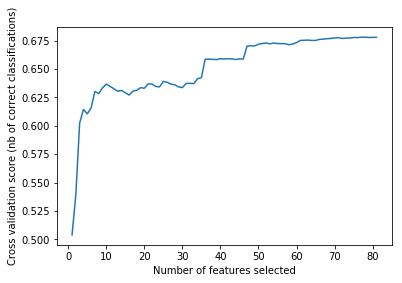

In [50]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=regr, step=1, cv=StratifiedKFold(2), scoring='roc_auc') # Using AUC instead of accuracy 
rfecv.fit(linear_x,linear_y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [51]:
# Feature Selection  Recursive Feature Elimination (RFE)
# from sklearn.feature_selection import RFE

rfe = RFE(regr, n_features_to_select=78,step=1)
rfe = rfe.fit(linear_x,linear_y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [53]:
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel
rfe = RFE(estimator=regr, n_features_to_select=1, step=1)
rfe.fit(linear_x, linear_y)
ranking = rfe.ranking_.reshape(3,27)   # change the matrix here
ranking

array([[31, 10, 67,  4, 47, 75, 61, 23, 72,  7, 28, 37, 16, 50, 52, 39,
        42, 79, 59, 60, 77, 43, 30, 26, 65,  5, 41],
       [15, 66, 45, 49, 48, 17, 33, 80, 76, 38, 74, 35, 70, 68, 24, 78,
        20, 56, 73, 55, 21, 34, 22, 58, 64, 51, 46],
       [69, 63, 53, 54, 44, 32, 57, 19,  6, 18, 81,  9, 71, 36, 13, 14,
        12,  8, 27, 62,  1,  2, 40,  3, 25, 11, 29]])

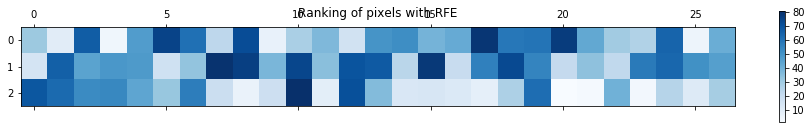

In [54]:
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

### Predict

In [265]:
regr_pred=regr.predict(df_modelb_P_select_201801.iloc[:,0:81]) # Class

regr_predict_proba=regr.predict_proba(df_modelb_P_select_201801.iloc[:,0:81])  # probability

In [266]:
print('Predict_prob',regr_predict_proba[:,[1]])   # get a column from array
regr_pred_df=pd.DataFrame(regr_pred)
print('Predict',regr_pred_df)
print('True Lable',df_modelb_P_select_201801['FUND_CNT'])

Predict_prob [[0.44956444]
 [0.31464086]
 [0.05937548]
 [0.24461465]
 [0.44699532]
 [0.48260962]
 [0.17641043]
 [0.53787062]
 [0.70304246]
 [0.51218445]
 [0.24571314]
 [0.58092328]
 [0.42642483]
 [0.34254329]
 [0.7022304 ]
 [0.35289049]
 [0.36678931]
 [0.41566274]
 [0.80443162]
 [0.7088098 ]
 [0.34492129]
 [0.79652724]
 [0.6019987 ]
 [0.39683421]
 [0.91430903]
 [0.41340832]
 [0.82934033]
 [0.302601  ]
 [0.17208641]
 [0.21217315]
 [0.46675622]
 [0.58135673]
 [0.60908386]
 [0.53314563]
 [0.46290052]
 [0.62496006]
 [0.77548024]
 [0.60829221]
 [0.65692947]
 [0.53151236]
 [0.28056014]
 [0.40774789]
 [0.29731096]
 [0.61060692]
 [0.19545799]
 [0.50289422]
 [0.42012332]
 [0.42919249]
 [0.70431127]
 [0.5195308 ]
 [0.41254095]
 [0.53273976]
 [0.63891706]
 [0.21250658]
 [0.5329782 ]
 [0.4243884 ]
 [0.44384416]
 [0.24943209]
 [0.36261965]
 [0.30565213]
 [0.40433177]
 [0.47926123]
 [0.70687084]
 [0.65073944]
 [0.60517695]
 [0.75132661]
 [0.74041504]
 [0.46073455]
 [0.37703637]
 [0.25951734]
 [0.590

[570 rows x 1 columns]
True Lable 200      0
454      0
543      0
558      0
568      0
1145     0
1555     0
1612     0
1671     0
2122     0
2328     0
2712     0
2715     0
2963     0
2981     0
3046     0
3059     0
3060     0
3076     0
3084     0
3152     0
3243     0
3257     0
3312     0
3320     0
3342     0
3426     0
3446     0
3485     0
3494     0
        ..
50191    0
50360    0
50374    1
50383    0
50561    1
50730    0
50747    0
50750    0
50756    0
50757    0
50912    0
51136    1
51165    0
51322    0
51324    0
51359    1
51517    0
51538    0
51731    0
51883    0
52244    1
52246    0
52331    0
52376    0
52439    1
52843    0
52846    0
53185    0
53191    0
53260    0
Name: FUND_CNT, Length: 570, dtype: int64


In [267]:
print(df_modelb_P_select_201801['FUND_CNT'].sum())
print(regr_pred.sum())
print('R2 score',r2_score(df_modelb_P_select_201801['FUND_CNT'], regr_pred_df))
print('Score',regr.score( df_modelb_P_select_201801.iloc[:,0:81],df_modelb_P_select_201801[['FUND_CNT']])) # need dataframe input

57
284
R2 score -4.048732943469785
Score 0.5456140350877193


In [268]:
## Self definition to give AUC and KS

def AUC_KS (True_label,Pred_Prob):
    auc=metrics.roc_auc_score(True_label,Pred_Prob)
    print ('\033[1m','AUC is:', round(auc,6))
    fpr, tpr, thresholds = metrics.roc_curve(True_label, Pred_Prob, pos_label=1)
    print('\033[1m','KS is:',round(max(tpr-fpr),5)) 
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    return

 AUC is: 0.648131
 KS is: 0.25731


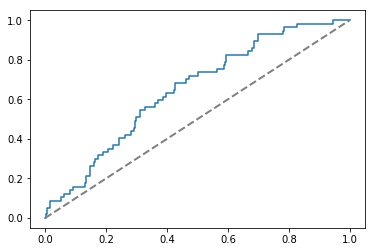

In [269]:
AUC_KS(df_modelb_P_select_201801['FUND_CNT'], regr_predict_proba[:,[1]] )

## Linear Lasso (can be ignored)

In [116]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(linear_x, linear_y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
reg_pred=reg.predict(df_modelb_P_select_201801.iloc[:,0:81])

In [119]:
reg_pred_df = pd.Series(reg_pred)
reg_pred_df

0      0.078512
1      0.035991
2      0.032177
3      0.082074
4      0.070738
5      0.090094
6      0.080635
7      0.078843
8      0.098548
9      0.069232
10     0.080142
11     0.112416
12     0.075359
13     0.061106
14     0.105080
15     0.065429
16     0.076256
17     0.071092
18     0.117242
19     0.102749
20     0.101845
21     0.139775
22     0.120380
23     0.056124
24     0.104529
25     0.055899
26     0.091571
27     0.071187
28     0.050562
29     0.059365
         ...   
540    0.048700
541    0.065818
542    0.097421
543    0.131261
544    0.058228
545    0.074417
546    0.119992
547    0.075681
548    0.057398
549    0.067379
550    0.080585
551    0.096220
552    0.055923
553    0.050334
554    0.094033
555    0.090384
556    0.094655
557    0.055643
558    0.064464
559    0.118732
560    0.048754
561    0.102313
562    0.063519
563    0.062998
564    0.093725
565    0.082592
566    0.113885
567    0.100093
568    0.068671
569    0.108472
Length: 570, dtype: floa

In [120]:
reg_pred_df.max()

0.21565154961714167

In [121]:
from sklearn.metrics import r2_score

r2_score(df_modelb_P_select_201801['FUND_CNT'], reg_pred_df)

0.0042237767051882535

# H2O Dataset

In [1]:
# ! pip install h2o

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [92]:
import h2o
# Initialize H2O using h2o.init().
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\xiaoxima\AppData\Local\Temp\tmp774a4f18
  JVM stdout: C:\Users\xiaoxima\AppData\Local\Temp\tmp774a4f18\h2o_xiaoxima_started_from_python.out
  JVM stderr: C:\Users\xiaoxima\AppData\Local\Temp\tmp774a4f18\h2o_xiaoxima_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.16.0.2
H2O cluster version age:,7 months and 18 days !!!
H2O cluster name:,H2O_from_python_xiaoxima_lqubt3
H2O cluster total nodes:,1
H2O cluster free memory:,1.754 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [93]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch    

In [283]:
# H2O dataframe  (some issue here    pandas to csv    and    then csv to h2o)

h2o_df_P = h2o.H2OFrame( df_modelb_P_select) 
 
h2o_df_P_201801 = h2o.H2OFrame( df_modelb_P_select_201801) 
h2o_df_P_201802= h2o.H2OFrame( df_modelb_P_select_201802) 
h2o_df_P_201803 = h2o.H2OFrame( df_modelb_P_select_201803) 
h2o_df_P_201804 = h2o.H2OFrame( df_modelb_P_select_201804) 
h2o_df_P_201805 = h2o.H2OFrame( df_modelb_P_select_201805) 

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [284]:
y_column = 'FUND_CNT'

X_columns_a =  col_select_1.copy()
X_columns_a.remove('FUND_CNT')
X_columns = X_columns_a


In [285]:
# Change data type

for i in col_categ: 
    h2o_df_P[i] = h2o_df_P[i].asfactor()
    h2o_df_P_201801[i] = h2o_df_P_201801[i].asfactor()
    h2o_df_P_201802[i] = h2o_df_P_201802[i].asfactor()
    h2o_df_P_201803[i] = h2o_df_P_201803[i].asfactor()
    h2o_df_P_201804[i] = h2o_df_P_201804[i].asfactor()
    h2o_df_P_201805[i] = h2o_df_P_201805[i].asfactor()

In [286]:
for i in col_contin: 
    h2o_df_P[i] = h2o_df_P[i].asnumeric()
    h2o_df_P_201801[i] = h2o_df_P_201801[i].asnumeric()
    h2o_df_P_201802[i] = h2o_df_P_201802[i].asnumeric()
    h2o_df_P_201803[i] = h2o_df_P_201803[i].asnumeric()
    h2o_df_P_201804[i] = h2o_df_P_201804[i].asnumeric()
    h2o_df_P_201805[i] = h2o_df_P_201805[i].asnumeric()


In [ ]:
### transfer h2o dataset into pd.dataframe new dataset

h2o_df_P_201801_df=h2o_df_P_201801.as_data_frame()    
h2o_df_P_201802_df=h2o_df_P_201802.as_data_frame()  
h2o_df_P_201803_df=h2o_df_P_201803.as_data_frame()  
h2o_df_P_201804_df=h2o_df_P_201804.as_data_frame()  
h2o_df_P_201805_df=h2o_df_P_201805.as_data_frame() 


In [287]:
train =  h2o_df_P
train[ 'FUND_CNT'] = train[ 'FUND_CNT'].asfactor()
print('train shape', train.shape) 
y = 'FUND_CNT'
x = X_columns


train shape (9587, 82)


## <font color='red'> GLM Logistic Regression with Lasso regularization </font> 

In [98]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [377]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          alpha=1,
                                          #lambda_=0.00041,
                                          lambda_search = True, 
                                          balance_classes=True,
                                          missing_values_handling="mean_imputation",
                                          #compute_p_values = True,(this is avalible when regularization is disabled lambda=0) 
                                          remove_collinear_columns=True)

# lambda_search = True, alpha=1 (Lasso penalties)  

In [289]:
## Validation and Train data

traindata, valid = train.split_frame(ratios = [.7],seed = 1234)

glm_model.train(x , y, training_frame = traindata, validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [290]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1532012605105_491


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07125690879361235
RMSE: 0.2669398973432266
LogLoss: 0.2551014690432892
Null degrees of freedom: 6743
Residual degrees of freedom: 6637
Null deviance: 3873.637589933337
Residual deviance: 3440.8086144558847
AIC: 3654.8086144558847
AUC: 0.7547826764136817
Gini: 0.5095653528273634
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1220130688768731: 


,0,1,Error,Rate
0,4993.0,1188.0,0.1922,(1188.0/6181.0)
1,262.0,301.0,0.4654,(262.0/563.0)
Total,5255.0,1489.0,0.215,(1450.0/6744.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1220131,0.2933723,191.0
max f2,0.0880018,0.4292714,240.0
max f0point5,0.2100320,0.2635659,97.0
max accuracy,0.6174145,0.9166667,0.0
max precision,0.6174145,1.0,0.0
max recall,0.0047763,1.0,395.0
max specificity,0.6174145,1.0,0.0
max absolute_mcc,0.1220131,0.2283635,191.0
max min_per_class_accuracy,0.0920055,0.6856128,234.0
max mean_per_class_accuracy,0.0880018,0.6929631,240.0


Gains/Lift Table: Avg response rate:  8.35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100830,0.3161259,4.7562428,4.7562428,0.3970588,0.3970588,0.0479574,0.0479574,375.6242817,375.6242817
,2,0.0200178,0.2670029,2.8605816,3.8154332,0.2388060,0.3185185,0.0284192,0.0763766,186.0581639,281.5433195
,3,0.0301008,0.2401812,3.5231428,3.7175231,0.2941176,0.3103448,0.0355240,0.1119005,252.3142827,271.7523121
,4,0.0400356,0.2231379,2.8605816,3.5048747,0.2388060,0.2925926,0.0284192,0.1403197,186.0581639,250.4874679
,5,0.0501186,0.2103027,3.6993000,3.5439898,0.3088235,0.2958580,0.0373002,0.1776199,269.9299969,254.3989826
,6,0.1000890,0.1702999,1.9194333,2.7329149,0.1602374,0.2281481,0.0959147,0.2735346,91.9433303,173.2914940
,7,0.1500593,0.1470496,2.1327037,2.5330422,0.1780415,0.2114625,0.1065719,0.3801066,113.2703670,153.3042215
,8,0.2000297,0.1272711,2.0616135,2.4152724,0.1721068,0.2016308,0.1030195,0.4831261,106.1613548,141.5272414
,9,0.2999703,0.1012853,1.5462102,2.1257282,0.1290801,0.1774592,0.1545293,0.6376554,54.6210161,112.5728193
,10,0.4002076,0.0805784,1.0986368,1.8684797,0.0917160,0.1559837,0.1101243,0.7477798,9.8636846,86.8479675




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.07252486248237054
RMSE: 0.26930440486997337
LogLoss: 0.26361122094393064
Null degrees of freedom: 2842
Residual degrees of freedom: 2736
Null deviance: 1602.5980743694845
Residual deviance: 1498.8934022871886
AIC: 1712.8934022871886
AUC: 0.7055083762587591
Gini: 0.4110167525175181
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10299377640777808: 


,0,1,Error,Rate
0,1893.0,719.0,0.2753,(719.0/2612.0)
1,98.0,133.0,0.4242,(98.0/231.0)
Total,1991.0,852.0,0.2874,(817.0/2843.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1029938,0.2456140,210.0
max f2,0.0799993,0.4013220,247.0
max f0point5,0.2284700,0.1915185,71.0
max accuracy,0.5112919,0.9183961,0.0
max precision,0.3398793,0.3043478,19.0
max recall,0.0060986,1.0,394.0
max specificity,0.5112919,0.9996172,0.0
max absolute_mcc,0.0799993,0.1903727,247.0
max min_per_class_accuracy,0.0885653,0.6600306,231.0
max mean_per_class_accuracy,0.0799993,0.6719470,247.0


Gains/Lift Table: Avg response rate:  8.13 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102005,0.3214406,3.3951336,3.3951336,0.2758621,0.2758621,0.0346320,0.0346320,239.5133602,239.5133602
,2,0.0200492,0.2826054,1.3186456,2.3751044,0.1071429,0.1929825,0.0129870,0.0476190,31.8645640,137.5104428
,3,0.0302497,0.2508231,2.9707419,2.5759589,0.2413793,0.2093023,0.0303030,0.0779221,197.0741902,157.5958925
,4,0.0400985,0.2307825,2.1977427,2.4830637,0.1785714,0.2017544,0.0216450,0.0995671,119.7742733,148.3063720
,5,0.0502990,0.2199859,2.1219585,2.4098326,0.1724138,0.1958042,0.0216450,0.1212121,112.1958501,140.9832592
,6,0.1002462,0.1772041,1.3867447,1.9000835,0.1126761,0.1543860,0.0692641,0.1904762,38.6744711,90.0083542
,7,0.1501935,0.1510180,1.9934455,1.9311313,0.1619718,0.1569087,0.0995671,0.2900433,99.3445522,93.1131320
,8,0.2001407,0.1291355,2.0801171,1.9683123,0.1690141,0.1599297,0.1038961,0.3939394,108.0117066,96.8312297
,9,0.3000352,0.1025877,1.8201024,1.9189669,0.1478873,0.1559203,0.1818182,0.5757576,82.0102433,91.8966926
,10,0.3999297,0.0826975,1.2134016,1.7427307,0.0985915,0.1416007,0.1212121,0.6969697,21.3401622,74.2730737



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-07-19 14:59:52,0.000 sec,1,.25E-1,1,0.5743828,0.5636996
,2018-07-19 14:59:52,0.013 sec,3,.23E-1,4,0.5727708,0.5623972
,2018-07-19 14:59:52,0.025 sec,5,.21E-1,4,0.5705304,0.5605544
,2018-07-19 14:59:52,0.038 sec,7,.19E-1,4,0.5686736,0.5590711
,2018-07-19 14:59:52,0.051 sec,9,.17E-1,5,0.5665415,0.5572627
---,---,---,---,---,---,---,---
,2018-07-19 14:59:53,0.831 sec,81,.38E-3,117,0.5090885,0.5272500
,2018-07-19 14:59:53,0.854 sec,82,.34E-3,121,0.5080058,0.5274728
,2018-07-19 14:59:53,0.873 sec,83,.31E-3,131,0.5069170,0.5277069
,2018-07-19 14:59:53,0.894 sec,84,.28E-3,134,0.5059453,0.5279890



See the whole table with table.as_data_frame()


#### Coefficient

In [342]:
glm_coefficient=glm_model._model_json['output']['coefficients_table'].as_data_frame()   # some variables are penalties to 0
glm_coefficient

,names,coefficients,standardized_coefficients
0,Intercept,-2.887346e+00,-3.987295
1,State.0,0.000000e+00,0.000000
2,State.1,0.000000e+00,0.000000
3,State.2,0.000000e+00,0.000000
4,State.3,0.000000e+00,0.000000
5,State.4,0.000000e+00,0.000000
6,State.5,-9.226767e-02,-0.092268
7,State.6,-2.020833e-02,-0.020208
8,State.7,0.000000e+00,0.000000
9,State.8,0.000000e+00,0.000000


In [362]:
glm_coefficient_nonezero=glm_coefficient[(glm_coefficient.standardized_coefficients!=0)][1:].names

glm_coefficient_nonezero

6                                   State.5
7                                   State.6
14                                 State.13
19                                 State.18
23                                 State.22
28                                 State.27
35                                 State.34
48                                 State.47
50                                 State.49
55                      MEDICALTITLEGROUP.3
56                      MEDICALTITLEGROUP.4
63                     MEDICALTITLEGROUP.11
68                     MEDICALTITLEGROUP.16
71                     MEDICALTITLEGROUP.20
74                           ADDRESS_TYPE.0
78                           ADDRESS_TYPE.5
81                           ADDRESS_TYPE.9
82                          ADDRESS_TYPE.10
83                          ADDRESS_TYPE.11
85                          ADDRESS_TYPE.13
90                      RaAMedIncomeRange.4
91                      RaAMedIncomeRange.5
93                      RaAMedIn

In [441]:
 df_modelb_P_select['State']

2         9
19        1
24       38
34       34
35       20
39       34
51        9
54       20
63        6
64        3
65        9
75       47
92       27
97       16
102       9
104       4
107      31
111      37
115      32
129      18
143      20
155       4
156       4
160       3
161      10
165       4
172      31
174       9
175      18
179      14
         ..
53192     9
53193    15
53194    34
53195     9
53196    34
53200     9
53202    27
53204     3
53205    43
53207    36
53208    10
53210    22
53211    34
53213     4
53214    18
53215    43
53217    15
53219    20
53220    24
53221     9
53224    14
53226    17
53230     4
53232    27
53233     9
53235    24
53323    10
53351    10
53353    35
53354     4
Name: State, Length: 9587, dtype: int64

In [363]:
x_lasso=list(glm_coefficient_nonezero)   # new list of X columns


# We strongly recommend avoidance of one-hot encoding categorical columns with many levels into many binary columns, as this is very inefficient

In [366]:
glm_model2 = H2OGeneralizedLinearEstimator(family= "binomial",
                                          alpha=1,
                                          #lambda_=0.00041,
                                          lambda_search = True, 
                                          balance_classes=True,
                                          missing_values_handling="mean_imputation",
                                          #compute_p_values = True,(this is avalible when regularization is disabled lambda=0) 
                                          remove_collinear_columns=True)

# lambda_search = True, alpha=1 (Lasso penalties)  

In [367]:
## Validation and Train data

traindata, valid = train.split_frame(ratios = [.7],seed = 1234)

glm_model2.train(x_lasso , y, training_frame = traindata, validation_frame = valid)

H2OValueError: Column State.5 not in the training frame

In [345]:
# save the coefficients to csv
glm_coefficient.to_csv('H:/1_Xiaoxi_Ma_Project/Model B/Data/GLM_h2o_coefficient .csv',sep=',')

### lamba=0.00041  predictors downsize from 240 to 107 (15 categoric and 55 numeric)

In [ ]:
glm_model.scoring_history()   

In [295]:
glm_model.gains_lift().as_data_frame()

,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010083,0.316126,4.756243,4.756243,0.397059,0.397059,0.047957,0.047957,375.624282,375.624282
1,,2,0.020018,0.267003,2.860582,3.815433,0.238806,0.318519,0.028419,0.076377,186.058164,281.543320
2,,3,0.030101,0.240181,3.523143,3.717523,0.294118,0.310345,0.035524,0.111901,252.314283,271.752312
3,,4,0.040036,0.223138,2.860582,3.504875,0.238806,0.292593,0.028419,0.140320,186.058164,250.487468
4,,5,0.050119,0.210303,3.699300,3.543990,0.308824,0.295858,0.037300,0.177620,269.929997,254.398983
5,,6,0.100089,0.170300,1.919433,2.732915,0.160237,0.228148,0.095915,0.273535,91.943330,173.291494
6,,7,0.150059,0.147050,2.132704,2.533042,0.178042,0.211462,0.106572,0.380107,113.270367,153.304221
7,,8,0.200030,0.127271,2.061614,2.415272,0.172107,0.201631,0.103020,0.483126,106.161355,141.527241
8,,9,0.299970,0.101285,1.546210,2.125728,0.129080,0.177459,0.154529,0.637655,54.621016,112.572819
9,,10,0.400208,0.080578,1.098637,1.868480,0.091716,0.155984,0.110124,0.747780,9.863685,86.847968


## Predict

### In time validation

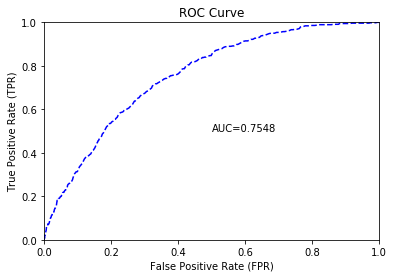

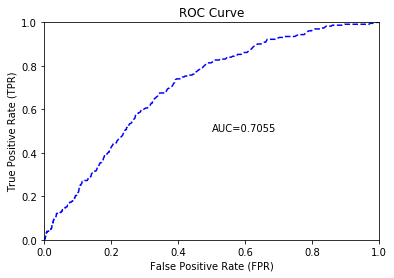

In [296]:
perf_glm=glm_model.model_performance(train=True)  # Train ROC AUC 0.7548
perf_glm_valid =glm_model.model_performance(valid)  # Valid ROC AUC 0.7055

perf_glm.plot()
perf_glm_valid.plot()

### Out of time validation

#### 201801

In [297]:
predictions_201801 = glm_model.predict(h2o_df_P_201801)
predict_probability_201801 = predictions_201801['p1'].as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


 AUC is: 0.650457
 KS is: 0.25146


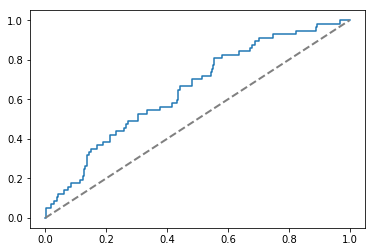

In [298]:
AUC_KS(h2o_df_P_201801_df['FUND_CNT'],predict_probability_201801)

#### 201802

In [302]:
predictions_201802 = glm_model.predict(h2o_df_P_201802)
predict_probability_201802 = predictions_201802['p1'].as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


 AUC is: 0.672774
 KS is: 0.29926


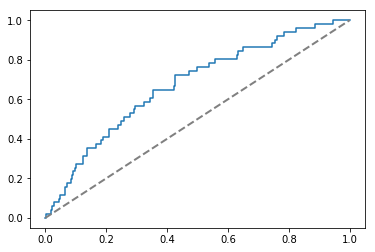

In [303]:
AUC_KS(h2o_df_P_201802_df['FUND_CNT'],predict_probability_201802)

## GBM

In [447]:
learn_rate =0.1
ntrees=200
max_depth = 5
col_sample_rate = 0.2

nbins_top_level =128
nbins = 20
nbins_cats = 80

In [379]:
traindata, valid = train.split_frame(ratios = [.7],seed = 1234)


In [432]:
 from h2o.grid.grid_search import H2OGridSearch

In [442]:
#Define parameters for gridsearch


hyper_parameters = {'ntrees': [2,5,8], 
                    'max_depth':[2,3,4], 
                    'learn_rate':[0.1,0.2],
                    'col_sample_rate':[0.4,0.7]}


In [443]:
hyper_parameters

{'col_sample_rate': [0.4, 0.7],
 'learn_rate': [0.1, 0.2],
 'max_depth': [2, 3, 4],
 'ntrees': [2, 5, 8]}

In [444]:
# Train and validate a cartesian grid of GBMs

gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)


In [445]:
gbm_grid1.train(x, y, training_frame=traindata,validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [446]:
# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf1

     col_sample_rate learn_rate max_depth sample_rate           model_ids  \
0                1.0        0.1         3         1.0  gbm_grid1_model_23   
1                0.2        0.1         5         1.0  gbm_grid1_model_27   
2                0.2        0.1         5         0.8   gbm_grid1_model_9   
3                0.2        0.1         3         0.8   gbm_grid1_model_3   
4                0.2        0.1         3         1.0  gbm_grid1_model_21   
5                0.5        0.1         3         1.0  gbm_grid1_model_22   
6                0.2       0.01         5         1.0  gbm_grid1_model_24   
7                0.5        0.1         5         1.0  gbm_grid1_model_28   
8                0.2       0.01         9         0.8  gbm_grid1_model_12   
9                0.5        0.1         3         0.8   gbm_grid1_model_4   
10               0.2       0.01         9         1.0  gbm_grid1_model_30   
11               0.5        0.1         5         0.8  gbm_grid1_model_10   

In [448]:
# GBM

best_gbm1 = H2OGradientBoostingEstimator(
   learn_rate=learn_rate,
   ntrees=ntrees,
   max_depth=max_depth,
   col_sample_rate=col_sample_rate,
   nbins_top_level =nbins_top_level ,
   nbins=nbins,
   nbins_cats = nbins_cats,
   calibrate_model = True,
   calibration_frame = traindata,
   model_id="endofmay_modelB_pullthrough_45",
   categorical_encoding="one_hot_explicit", # this one can improve performance
   distribution='bernoulli',
   #balance_classes=True,
   seed=1234
)


In [449]:
best_gbm1.train(x, y, training_frame=traindata,validation_frame = valid)

gbm_perf2= best_gbm1.predict(h2o_df_P_201801)
y_predict_proba = gbm_perf2.as_data_frame()['p1']

gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [450]:
best_gbm1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  endofmay_modelB_pullthrough_45


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.033646581594929996
RMSE: 0.18343004550762668
LogLoss: 0.1279299286214688
Mean Per-Class Error: 0.056962363606112065
AUC: 0.9867456075643487
Gini: 0.9734912151286974
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24833034579057892: 


,0,1,Error,Rate
0,6142.0,39.0,0.0063,(39.0/6181.0)
1,111.0,452.0,0.1972,(111.0/563.0)
Total,6253.0,491.0,0.0222,(150.0/6744.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2483303,0.8576850,173.0
max f2,0.1780985,0.8703072,203.0
max f0point5,0.3151106,0.9151073,150.0
max accuracy,0.2539130,0.9777580,171.0
max precision,0.9419502,1.0,0.0
max recall,0.0456832,1.0,326.0
max specificity,0.9419502,1.0,0.0
max absolute_mcc,0.2483303,0.8480120,173.0
max min_per_class_accuracy,0.1381649,0.9378330,227.0
max mean_per_class_accuracy,0.1527900,0.9430376,218.0


Gains/Lift Table: Avg response rate:  8.35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100830,0.7102403,11.9786856,11.9786856,1.0,1.0,0.1207815,0.1207815,1097.8685613,1097.8685613
,2,0.0200178,0.6117838,11.9786856,11.9786856,1.0,1.0,0.1190053,0.2397869,1097.8685613,1097.8685613
,3,0.0301008,0.5126768,11.9786856,11.9786856,1.0,1.0,0.1207815,0.3605684,1097.8685613,1097.8685613
,4,0.0400356,0.4575064,11.7998993,11.9343201,0.9850746,0.9962963,0.1172291,0.4777975,1079.9899260,1093.4320111
,5,0.0501186,0.3848836,11.9786856,11.9432457,1.0,0.9970414,0.1207815,0.5985790,1097.8685613,1094.3245715
,6,0.1000890,0.1783738,6.1137505,9.0328163,0.5103858,0.7540741,0.3055062,0.9040853,511.3750520,803.2816262
,7,0.1500593,0.1264133,0.8886265,6.3207689,0.0741840,0.5276680,0.0444050,0.9484902,-11.1373471,532.0768891
,8,0.2000297,0.1007446,0.3909957,4.8394245,0.0326409,0.4040030,0.0195382,0.9680284,-60.9004327,383.9424506
,9,0.2999703,0.0715505,0.1954978,3.2922141,0.0163205,0.2748393,0.0195382,0.9875666,-80.4502164,229.2214138
,10,0.4000593,0.0524124,0.0709848,2.4863098,0.0059259,0.2075612,0.0071048,0.9946714,-92.9015196,148.6309838




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0721101073151847
RMSE: 0.26853325178678467
LogLoss: 0.2618415257817606
Mean Per-Class Error: 0.3212785810412151
AUC: 0.7292590640599829
Gini: 0.45851812811996573
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1397595688456242: 


,0,1,Error,Rate
0,2326.0,286.0,0.1095,(286.0/2612.0)
1,147.0,84.0,0.6364,(147.0/231.0)
Total,2473.0,370.0,0.1523,(433.0/2843.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1397596,0.2795341,156.0
max f2,0.0691750,0.4083246,253.0
max f0point5,0.1578359,0.2465555,137.0
max accuracy,0.7132536,0.9183961,0.0
max precision,0.6802275,0.3333333,2.0
max recall,0.0033893,1.0,395.0
max specificity,0.7132536,0.9996172,0.0
max absolute_mcc,0.0850707,0.2159502,226.0
max min_per_class_accuracy,0.0678157,0.6753247,255.0
max mean_per_class_accuracy,0.0691750,0.6787214,253.0


Gains/Lift Table: Avg response rate:  8.13 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102005,0.3853563,2.1219585,2.1219585,0.1724138,0.1724138,0.0216450,0.0216450,112.1958501,112.1958501
,2,0.0200492,0.3195609,3.9559369,3.0228602,0.3214286,0.2456140,0.0389610,0.0606061,295.5936920,202.2860181
,3,0.0302497,0.2731143,2.9707419,3.0052854,0.2413793,0.2441860,0.0303030,0.0909091,197.0741902,200.5285412
,4,0.0400985,0.2438817,2.1977427,2.8069416,0.1785714,0.2280702,0.0216450,0.1125541,119.7742733,180.6941596
,5,0.0502990,0.2221312,2.9707419,2.8401598,0.2413793,0.2307692,0.0303030,0.1428571,197.0741902,184.0159840
,6,0.1002462,0.1585043,2.9468325,2.8933090,0.2394366,0.2350877,0.1471861,0.2900433,194.6832510,189.3309030
,7,0.1501935,0.1301001,1.9067740,2.5652341,0.1549296,0.2084309,0.0952381,0.3852814,90.6773977,156.5234141
,8,0.2001407,0.1085397,1.3000732,2.2494998,0.1056338,0.1827768,0.0649351,0.4502165,30.0073166,124.9499768
,9,0.3000352,0.0774464,1.6900951,2.0632502,0.1373239,0.1676436,0.1688312,0.6190476,69.0095116,106.3250154
,10,0.3999297,0.0587161,0.7800439,1.7427307,0.0633803,0.1416007,0.0779221,0.6969697,-21.9956100,74.2730737



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-07-19 18:18:22,0.089 sec,0.0,0.2766088,0.2871914,0.5,1.0,0.9165184,0.2732311,0.2818498,0.5,1.0,0.9187478
,2018-07-19 18:18:22,0.172 sec,1.0,0.2750185,0.2819241,0.7108052,4.7562428,0.2412515,0.2724625,0.2791238,0.6444499,0.7239623,0.2648611
,2018-07-19 18:18:22,0.217 sec,2.0,0.2735691,0.2773099,0.7408061,5.4303375,0.2037367,0.2717705,0.2767957,0.6635285,2.2242216,0.2381287
,2018-07-19 18:18:22,0.261 sec,3.0,0.2720723,0.2730195,0.7529706,7.2224428,0.1401246,0.2710790,0.2745112,0.6745018,1.1188508,0.2374253
,2018-07-19 18:18:22,0.303 sec,4.0,0.2710725,0.2700724,0.7689164,7.2913739,0.1270759,0.2705306,0.2726018,0.6895414,1.6975668,0.2620471
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-07-19 18:18:25,3.845 sec,64.0,0.2347065,0.1954841,0.9315495,11.9786856,0.0578292,0.2659057,0.2557413,0.7401139,2.1219585,0.1765740
,2018-07-19 18:18:25,3.912 sec,65.0,0.2340941,0.1946174,0.9322774,11.9786856,0.0564947,0.2660395,0.2560583,0.7390035,2.1219585,0.1769258
,2018-07-19 18:18:26,3.979 sec,66.0,0.2337696,0.1940477,0.9333754,11.9786856,0.0563464,0.2661692,0.2563034,0.7381093,2.1219585,0.1916989
,2018-07-19 18:18:26,4.045 sec,67.0,0.2333929,0.1934848,0.9341010,11.9786856,0.0557533,0.2662138,0.2563555,0.7382809,1.6975668,0.1772775



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ProspectAge,50.7794418,1.0,0.0544924
ResCurrBusinessCnt,46.9239349,0.9240735,0.0503550
LifeEvTimeLastMove,35.5831528,0.7007393,0.0381850
Total_Sent_Site,23.4258194,0.4613249,0.0251387
PropTimeLastSale,22.3100624,0.4393523,0.0239414
---,---,---,---
ProspectGender.missing(NA),0.0,0.0,0.0
ProspectCollegePrivate.0,0.0,0.0,0.0
ProspectCollegePrivate.1,0.0,0.0,0.0
ProspectCollegePrivate.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


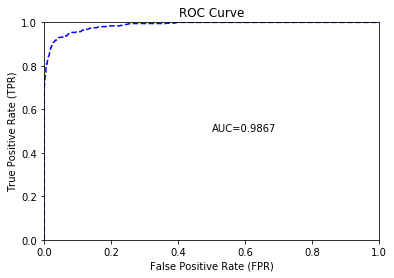

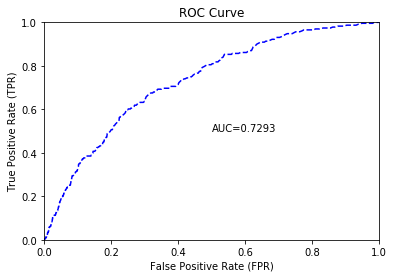

In [451]:
perf_gbm=best_gbm1.model_performance(train=True)  # Train ROC AUC 0.9543
perf_gbm_valid =best_gbm1.model_performance(valid)  # Valid ROC AUC 0.7271

perf_gbm.plot()
perf_gbm_valid.plot()

In [452]:
### transfer h2o dataset into pd.dataframe

gbm_perf2_df=gbm_perf2.as_data_frame()
gbm_perf2_df

,predict,p0,p1,cal_p0,cal_p1
0,0,0.981653,0.018347,0.987377,0.012623
1,0,0.979837,0.020163,0.986875,0.013125
2,0,0.991375,0.008625,0.989759,0.010241
3,0,0.962569,0.037431,0.981002,0.018998
4,0,0.988242,0.011758,0.989045,0.010955
5,0,0.944153,0.055847,0.971899,0.028101
6,0,0.976287,0.023713,0.985836,0.014164
7,0,0.875925,0.124075,0.886823,0.113177
8,1,0.780053,0.219947,0.493083,0.506917
9,0,0.945936,0.054064,0.972940,0.027060


In [453]:
## Self definition to give AUC and KS

def AUC_KS (True_label,Pred_Prob):
    auc=metrics.roc_auc_score(True_label,Pred_Prob)
    print ('\033[1m','AUC is:', round(auc,6))
    fpr, tpr, thresholds = metrics.roc_curve(True_label, Pred_Prob, pos_label=1)
    print('\033[1m','KS is:',round(max(tpr-fpr),5)) 
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    return

 AUC is: 0.642625
 KS is: 0.24756


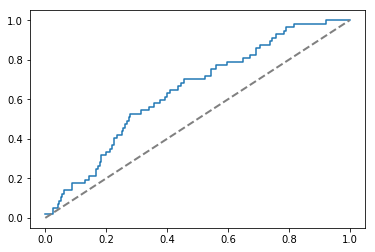

In [454]:
AUC_KS(h2o_df_P_201801_df['FUND_CNT'],gbm_perf2_df[['cal_p1']])

 AUC is: 0.680791
 KS is: 0.32749


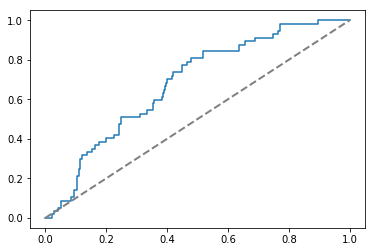

In [407]:
AUC_KS(h2o_df_P_201801_df['FUND_CNT'],gbm_perf2_df[['p1']])

In [389]:
model_path = h2o.save_model(model=best_gbm1, force=True)
print(model_path)
saved_model = h2o.load_model('C:/Users/xiaoxima/Xiaoxi_Python/Model B/endofmay_modelB_pullthrough_45')

C:\Users\xiaoxima\Xiaoxi_Python\Model B\endofmay_modelB_pullthrough_45
